In [1]:
from google.colab import files
uploaded = files.upload()

Saving epa-sea-level.csv to epa-sea-level.csv


In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(io.BytesIO(uploaded['epa-sea-level.csv']))

In [3]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


# Draw plot


### #Create scatter plot
Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.

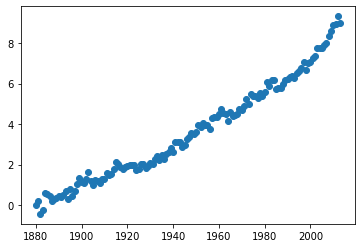

In [4]:
plt.scatter(x= 'Year', y='CSIRO Adjusted Sea Level', data=df)

### # Create first line of best fit
Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

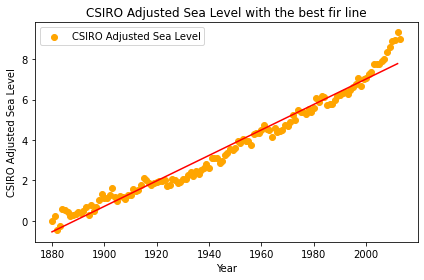

In [5]:
from scipy import stats
#print(stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level']))
slope, intercept, r_value, p_value, std_err =stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
line_x = np.arange(df['Year'].min(), df['Year'].max())
line_y = slope*line_x + intercept
plt.scatter(x= 'Year', y='CSIRO Adjusted Sea Level', data=df, color='orange')
plt.plot(line_x, line_y, color='red')
plt.legend()
plt.title('CSIRO Adjusted Sea Level with the best fir line')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.tight_layout()

### #Create second line of best fit
Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

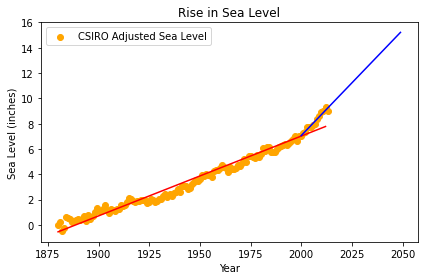

In [6]:
#Scatter Plot
plt.scatter(x= 'Year', y='CSIRO Adjusted Sea Level', data=df, color='orange')

#first line of best fit
slope, intercept, r_value, p_value, std_err =stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
line_x = np.arange(df['Year'].min(), df['Year'].max())
line_y = slope*line_x + intercept
plt.plot(line_x, line_y, color='red')

#second line of best fit
ax= df['Year'].loc[df['Year']>=2000]
ay=df['CSIRO Adjusted Sea Level'].loc[df['Year']>=2000]
slope, intercept, r_value, p_value, std_err =stats.linregress(ax, ay)
line_x = np.arange(2000,2050)
line_y = slope*line_x + intercept
plt.plot(line_x, line_y, color='blue')
plt.legend()

# Add labels and title
# The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.tight_layout()